<a href="https://colab.research.google.com/github/sk4201/NLP/blob/master/Neural_Network_7_july.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#loading data via pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [0]:
#loading data from url
df=pd.read_csv('http://13.234.66.67/summer19/datasets/bank.csv')

In [252]:
#schema
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [253]:
#top 5 rows
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


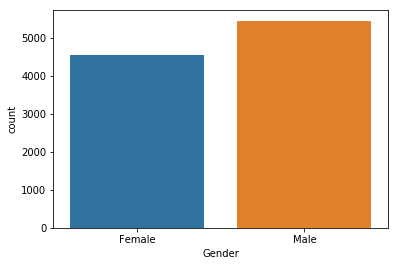

In [254]:
#count plot by seaborn
sb.countplot(df['Gender'])

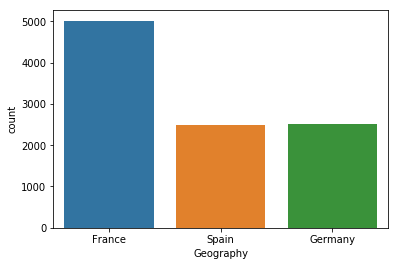

In [255]:

sb.countplot(df['Geography'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87949a8710>,
      dtype=object)

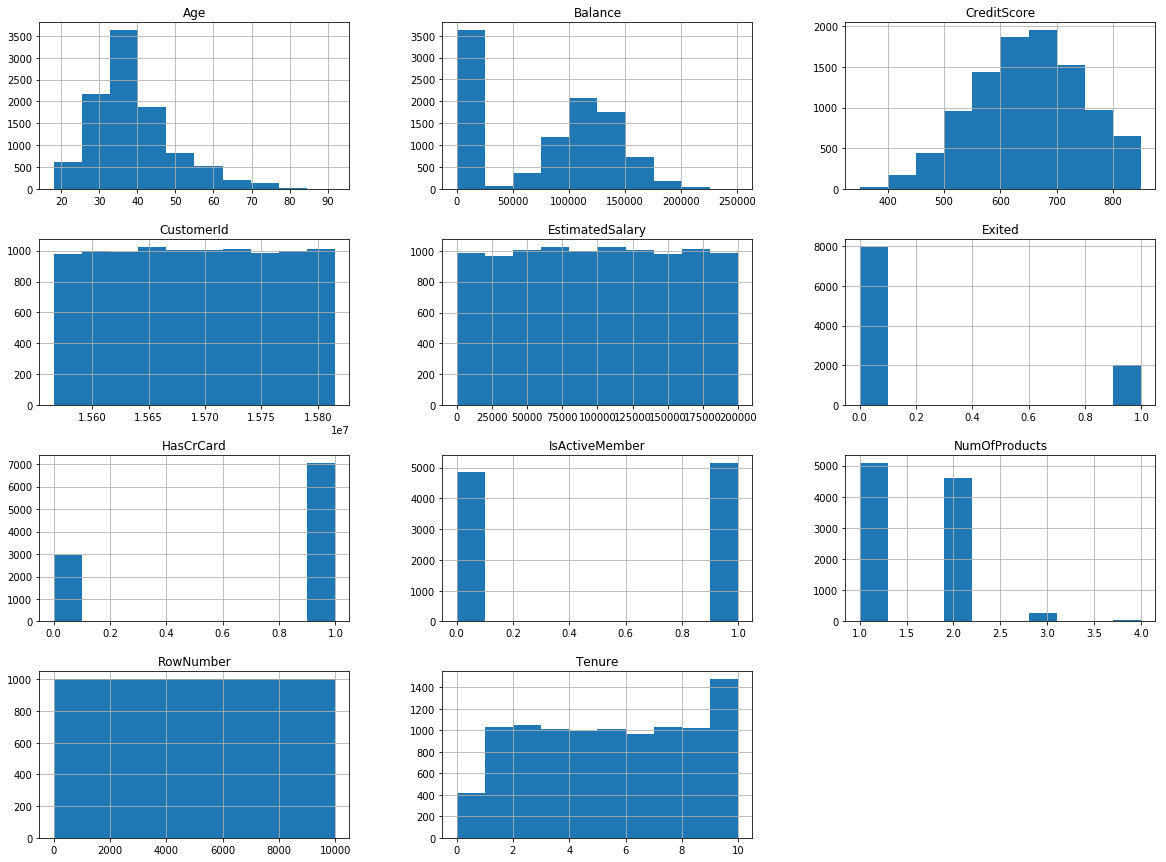

In [256]:

#histogram
df.hist(figsize=(20,15))

In [0]:
#features and lable
features=df.iloc[0:,3:13].values


In [258]:
features

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [259]:
features.shape

(10000, 10)

In [0]:
label=df.iloc[0:,13].values

In [261]:
label

array([1, 0, 1, ..., 1, 1, 0])

In [0]:
#convert string data into numeric we can apply label encoding
from sklearn.preprocessing import LabelEncoder

In [0]:
countryenc=LabelEncoder()

In [264]:

#fit country and transformed into a number
features[0:,1]=countryenc.fit_transform(features[0:,1])
features


array([[619, 0, 'Female', ..., 1, 1, 101348.88],
       [608, 2, 'Female', ..., 0, 1, 112542.58],
       [502, 0, 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 0, 'Female', ..., 0, 1, 42085.58],
       [772, 1, 'Male', ..., 1, 0, 92888.52],
       [792, 0, 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [265]:
#same for gender
features[0:,2]=countryenc.fit_transform(features[0:,2])
features

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [0]:

#creating dummy variables using oneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [0]:

#calling function
counthot=OneHotEncoder(categorical_features=[1])

In [268]:
features=counthot.fit_transform(features).toarray()
features1=features[:,1:]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [269]:
features1.shape

(10000, 11)

In [270]:
features

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [0]:
# now time for seprating data into two category
#1 . ---training data
#2 . --- testing data -- Questions
StandardScaler
from  sklearn.model_selection import train_test_split

In [0]:
#train_data=X,test_data=x,label_train=y,label_test=y
X,x,Y,y=train_test_split(features1,label,test_size=0.2)

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
# calling decision StandardScaler
sc=StandardScaler()

In [0]:
#now time for training StandardScaler
X=sc.fit_transform(X)

In [0]:
x=sc.fit_transform(x)

In [277]:
X.shape
x.shape

(2000, 11)

### Now we can create ANN Model


In [0]:
import keras # this is the way of uising tensflow in background 

In [0]:
# keras ANN model library import
from keras .models import Sequential
# this will offer external model of ANN

In [0]:
# filling data in each layer ---
from keras.layers import Dense #  this will give the method to decide activation function and number of nodes in each layer
# including input, hidden and output layer

In [0]:
# now we  can design model
model=Sequential()

In [0]:
# now we can add input layer
model.add(Dense(6,input_shape=(11,),activation="relu"))

# relu --means rectifier activation function

In [0]:
# adding one more hidden layer
model.add(Dense(6,activation="relu"))
# NOTE:--- we donot have to assign  number of inputs after  first / input layer

In [0]:
# final layer adding 
model.add(Dense(1,activation='sigmoid'))

In [0]:
# compile 
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# optimizer --- weight adjust method --stochitis g d(adam)

In [286]:
# trainning data fit
model.fit(X,Y,batch_size=2000,epochs=100)

Epoch 1/100
8000/8000 [==============================] - 0s 54us/step - loss: 0.9328 - acc: 0.2645
Epoch 2/100
8000/8000 [==============================] - 0s 2us/step - loss: 0.9121 - acc: 0.2770
Epoch 3/100
8000/8000 [==============================] - 0s 2us/step - loss: 0.8909 - acc: 0.2931
Epoch 4/100
8000/8000 [==============================] - 0s 2us/step - loss: 0.8701 - acc: 0.3089
Epoch 5/100
8000/8000 [==============================] - 0s 2us/step - loss: 0.8502 - acc: 0.3235
Epoch 6/100
8000/8000 [==============================] - 0s 2us/step - loss: 0.8310 - acc: 0.3455
Epoch 7/100
8000/8000 [==============================] - 0s 2us/step - loss: 0.8127 - acc: 0.3695
Epoch 8/100
8000/8000 [==============================] - 0s 2us/step - loss: 0.7953 - acc: 0.3914
Epoch 9/100
8000/8000 [==============================] - 0s 2us/step - loss: 0.7787 - acc: 0.4147
Epoch 10/100
8000/8000 [==============================] - 0s 2us/step - loss: 0.7630 - acc: 0.4382
Epoch 11/100
8000/

In [287]:
model.predict(x) # now prediction test data

array([[0.28359416],
       [0.07942167],
       [0.24103269],
       ...,
       [0.15685165],
       [0.2096405 ],
       [0.10452193]], dtype=float32)